## Exercício: Modelo de Linguagem com auto-atenção

Este exercício é similar ao da aula passada, mas iremos agora treinar uma rede neural *com auto-atenção* para prever a próxima palavra de um texto, data as palavras anteriores como entrada.

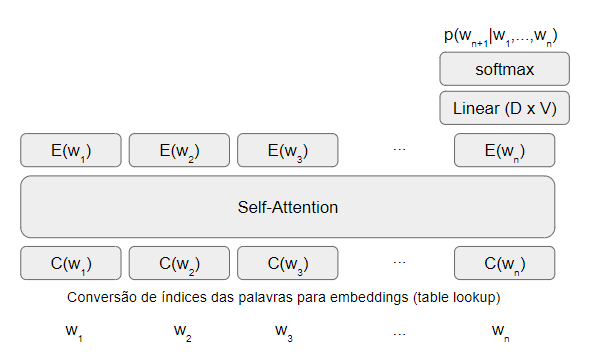

Na camada de auto-atenção, deve-se implementar (vide slide 41):
- Embeddings de posição
- Projeções lineares (WQ, WK, WV, WO)
- Camada de feed forward (2-layer MLP)



Instrucões:
- É necessário fazer duas implementações da camada de auto-atenção: uma usando laços (ineficiente, mas fácil de entender) e outra matricial (eficiente mas difícil de entender). Usar slide 41 como referência.

- Fazer um assert para garantir que o resultado das duas implementações é exatamente igual.

- No treinamento, usar apenas a implementação matricial.

## Faz download e carrega o dataset

In [ ]:
!git clone https://github.com/ethelbeluzzi/projetomachado

Cloning into 'projetomachado'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 65 (delta 24), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (65/65), 7.21 MiB | 3.44 MiB/s, done.
Resolving deltas: 100% (24/24), done.


In [ ]:
import os
# >>> Análise varia dependendo do formato que os dados são fornecidos <<<

DATA_PATH = os.path.join("projetomachado", "textonormalizado1000.txt")

# Abrir arquito textual e ler os dados originais
with open(DATA_PATH, "r") as data_file:
    data_text = data_file.read()

# Número total de caracteres no dataset
len(data_text)

18845445

In [ ]:
# Dados já foram separados em linhas
# Checar tamanho das linhas em caracteres, por curiosidade
lines = []
line_lens = []

with open(DATA_PATH, "r") as data_file:
    for line in data_file:
        lines.append(line)
        line_lens.append(len(line))


In [ ]:
lines[0]

'1\n'

In [ ]:
# Limpar linhas, removendo \n, espaços antes e depois
with open(DATA_PATH, "r") as data_file:
    cleaned_lines = [line.strip().lower() for line in data_file]

len(cleaned_lines)

306409

In [ ]:
# Quantidade total de caracteres após limpeza
acum_chars = 0
for cleaned_line in cleaned_lines:
    acum_chars += len(cleaned_line)

acum_chars

# Possível fazer de forma mais "Pythônica"?

18539036

In [ ]:
####
sum([len(cleaned_line) for cleaned_line in cleaned_lines])


# Qual melhor forma?



18539036

In [ ]:
# É possível voltar a um texto monolítico juntando as linhas. Nota-se que estamos adicionando espaços, mas não há mais \n
full_data = ' '.join(cleaned_lines)
len(full_data)

18845444

In [ ]:
full_data[:1000]

'1 ministério da cultura fundação biblioteca nacional departamento nacional do livro a mão e a luva machado de assis i o fim da carta mas que pretendes fazer agora? morrer. morrer? que idéia! deixate disso, estêvão. não se morre por tão pouco... morrese. quem não padece estas dores não as pode avaliar. o golpe foi profundo, e o meu coração é pusilânime; por mais aborrecível que pareça a idéia da morte, pior, muito pior do que ela, é a de viver. ah! tu não sabes o que isto é? sei: um namoro gorado... luís! ... e se em cada caso de namoro gorado morresse um homem, tinha já diminuído muito o gênero humano, e malthus perderia o latim. anda, sobe. estêvão meteu a mão nos cabelos com um gesto de angústia; luís alves sacudiu a cabeça e sorriu. achavamse os dois no corredor da casa de luís alves, à rua da constituição,  que então se chamava dos ciganos;  então, isto é, em 1853, uma bagatela de vinte anos que lá vão, levando talvez consigo as ilusões do leitor, e deixandolhe em troca usurários!

In [ ]:
# Separar em treino e teste
limit = int(0.8*len(cleaned_lines))
train_cleaned_lines = cleaned_lines[:limit]
val_cleaned_lines = cleaned_lines[limit:]

# Não utilize o split val para nada a partir daqui, somente validar

In [ ]:
from collections import Counter
import re
# Contar número de palavras ÚNICAS
def count_words(texts):
    # Counter: collection especifica do Python para contar ocorrências de um objeto
    word_counts = Counter()
    for text in texts:
        word_counts.update(re.findall(r'\w+', text.lower()))
        #### Separado com regex, \w+: sequências alfanuméricas


    return word_counts

word_counts = count_words(train_cleaned_lines)


## Criando um vocabulário

In [ ]:
vocab_size = 10000
most_frequent_words = [word for word, count in word_counts.most_common(vocab_size)]
vocab = {word: i for i, word in enumerate(most_frequent_words, 1)}

## Classe do dataset

In [ ]:
context_size = 5 # 5 palavras de entrada. O target é a próxima palavra
"""TODO: Preparar o dataset"""

In [ ]:
"""TODO: divida o dataset em validação/treino com um proporção de 20/80 %. OBS, use random_state=18"""

In [ ]:
"""TODO: implemente a classe do dataset"""

train_data = MyDataset(...)
val_data = MyDataset

95377

In [ ]:
batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
sample = next(iter(train_loader))

## Model

In [ ]:
import torch.nn as nn

class LanguageModel(torch.nn.Module):
    """TODO: implementar o modelo de linguagem"""
    def __init__(self):
      pass
      """TODO: iniciliazar Wq,Wk,Wv aqui
      Ex: self.wq = nn.Linear(...)
      """

    """TODO: attention versão loop"""

    """TODO: attention versão matricial"""

    def forward(self, version="loop"): # interessante ter uma flag para indicar qual a versão usada (loop ou matricial)
      """TODO"""


In [ ]:
model = ...

In [ ]:
# sample = next(iter(train_loader))
input = sample[0]
target = sample[1]

In [ ]:
output1 = model(input,version="loop")
output2 = model(input,version="matrix")
are_equal = torch.allclose(output1, output2, atol=1e-6)  # Verifica se os resultados são próximos
are_equal

In [ ]:
output.argmax(dim=1)

tensor([4842, 2163, 7516, 2652, 6373, 7429, 8003, 3759, 1768, 7740, 2595, 1859,
        3189, 8049, 5727, 6132])

In [ ]:
target

tensor([   2,    3,    4,   37,    3,  215,   71,  411, 1263,  355,   87, 3653,
         584,  980,    1,    7])

## Training

In [ ]:
# Verifica se há uma GPU disponível e define o dispositivo para GPU se possível, caso contrário, usa a CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
epochs = 10
lr = """TODO: experimento""""
criterion = """TODO CrossEntropy""""

optimizer = """TODO: AdamW ou outro""""

model.to(device)

"""TODO: Implemente o loop de treinamento. Em cada época, calcule e imprima a loss no dataset de validação""""

## Avaliação

In [ ]:
""" TODO: calcule a perplexidade final no dataset de validação """

## Exemplo de uso

In [ ]:
text = ""

def generate_text(model, vocab, text, max_length):
    """TODO: implemente a função para gerar texto até atingir o max_length"""

context = 5
max_length= 10
generate_text(text, max_length)